Data Load


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#un rr the file
!apt-get install unrar
!unrar x /content/drive/MyDrive/Dataset.rar /content/


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset.rar

Creating    /content/Dataset                                          OK
Creating    /content/Dataset/Testing                                  OK
Creating    /content/Dataset/Testing/fire                             OK
Extracting  /content/Dataset/Testing/fire/abc001.jpg                       0%  OK 
Extracting  /content/Dataset/Testing/fire/abc002.jpg                       0%  OK 
Extracting  /content/Dataset/Testing/fire/abc003.jpg                       0%  OK 
Extracting  /content/Dataset/Testing/fire/abc004.jpg                       0%  OK 
Extracting  /content/Dataset/Testing/fire/abc005.jpg              

Libraries Import

In [ ]:
import tensorflow as tf
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


PATH GIVEN

In [ ]:
train_dir = '/content/Dataset/Training and Validation'
test_dir = '/content/Dataset/Testing'


PRE-PROCESS

In [ ]:
# --- Image Data Generator with Augmentation ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# --- Data Loaders ---
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1216 images belonging to 2 classes.
Found 304 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


TRAINING BY CPU

In [ ]:
# --- CPU Training ---
with tf.device('/CPU:0'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# --- Compile ---
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

with tf.device('/CPU:0'):
    start = time.time()
    history = model.fit(train_generator, epochs=15, validation_data=validation_generator)
    end = time.time()

print(f'\nCPU Training Time: {end - start:.2f} seconds')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8383 - loss: 0.3747

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8398 - loss: 0.3723 - val_accuracy: 0.9868 - val_loss: 0.1049
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9617 - loss: 0.1310 - val_accuracy: 0.9507 - val_loss: 0.1526
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9506 - loss: 0.1364 - val_accuracy: 0.9441 - val_loss: 0.1452
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9385 - loss: 0.1573 - val_accuracy: 0.9770 - val_loss: 0.0880
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9674 - loss: 0.0918 - val_accuracy: 0.9868 - val_loss: 0.0678
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9682 - loss: 0.0869 - val_accuracy: 0.9441 - val_loss: 0.1633
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9611 - loss: 0.1151 - val_accuracy: 0.9770 - val_loss: 0.1153
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.9617 - loss: 0.1070 - val_accuracy: 0.9836 - val_loss: 0.0698
Epo

In [ ]:
# --- Evaluate on Test Set ---
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy on CPU: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.9066 - loss: 0.2290
Test Accuracy on CPU: 0.9368


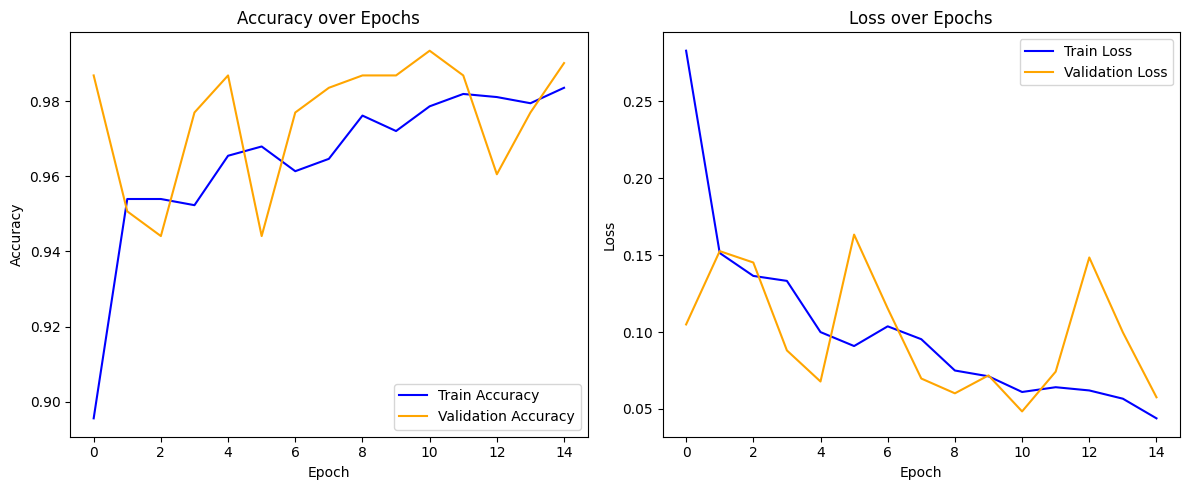

In [ ]:
# --- Accuracy & Loss Visualization ---
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

COMPARISION---
NOTE: DATA IS ALSO TAKEN FROM GPU TRAINING FILE


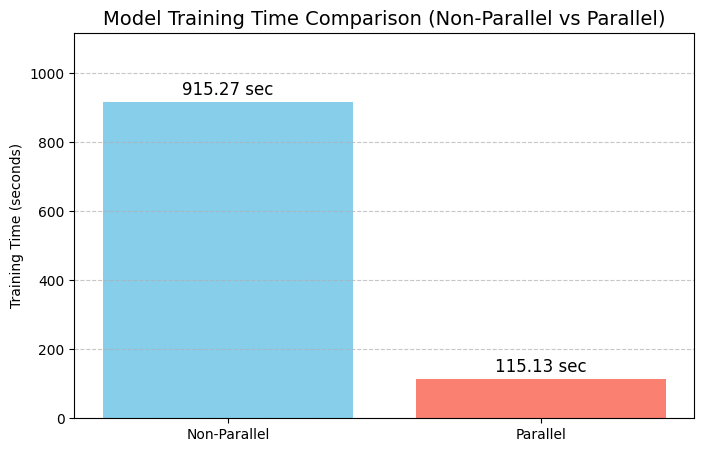

In [ ]:
import matplotlib.pyplot as plt

# Data
devices = ['Non-Parallel', 'Parallel']
times = [915.27, 115.13]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(devices, times, color=['skyblue', 'salmon'])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 20, f'{yval:.2f} sec', ha='center', fontsize=12)

plt.title('Model Training Time Comparison (Non-Parallel vs Parallel)', fontsize=14)
plt.ylabel('Training Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(times) + 200)
plt.show()


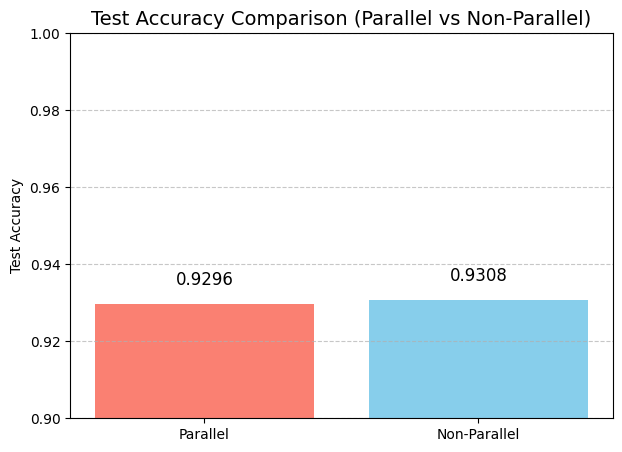

In [ ]:
import matplotlib.pyplot as plt

# Data
devices = ['Parallel', 'Non-Parallel']
accuracies = [0.9296, 0.9308]

# Plotting
plt.figure(figsize=(7, 5))
bars = plt.bar(devices, accuracies, color=['salmon', 'skyblue'])

# Adding data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}',
             ha='center', fontsize=12)

plt.title('Test Accuracy Comparison (Parallel vs Non-Parallel)', fontsize=14)
plt.ylabel('Test Accuracy')
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Latency of Cpu

In [ ]:
import time
import numpy as np

# Reset the generator to make sure it starts from the beginning
test_generator.reset()

# Get one batch of images from the test generator (batch size = 32)
images_batch, labels_batch = next(test_generator)

# --- Latency Measurement ---
start_time = time.time()
predictions = model.predict(images_batch)
end_time = time.time()

# --- Results ---
latency_per_batch = end_time - start_time
latency_per_image = latency_per_batch / images_batch.shape[0]

print(f"Latency per batch (32 images): {latency_per_batch:.4f} seconds")
print(f"Latency per image: {latency_per_image:.4f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
Latency per batch (32 images): 0.7485 seconds
Latency per image: 0.0234 seconds


In [ ]:
# Save the model in HDF5 format (.h5)
model.save('fire_detection_model(cpu).h5')


Latency Comparision

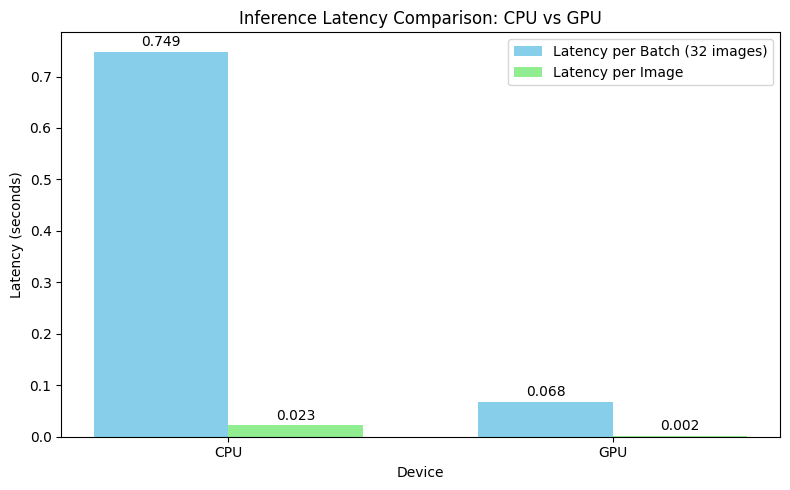

In [ ]:
import matplotlib.pyplot as plt

# Data
devices = ['CPU', 'GPU']
latency_per_batch = [0.7485, 0.0684]   # in seconds
latency_per_image = [0.0234, 0.0021]   # in seconds

# Bar Width
bar_width = 0.35
x = range(len(devices))

# Plotting
plt.figure(figsize=(8, 5))

# Bars for Batch Latency
plt.bar(x, latency_per_batch, width=bar_width, label='Latency per Batch (32 images)', color='skyblue')

# Bars for Image Latency (next to the batch bars)
plt.bar([i + bar_width for i in x], latency_per_image, width=bar_width, label='Latency per Image', color='lightgreen')

# Labels & Title
plt.xlabel('Device')
plt.ylabel('Latency (seconds)')
plt.title('Inference Latency Comparison: CPU vs GPU')
plt.xticks([i + bar_width/2 for i in x], devices)
plt.legend()

# Display Values on Bars
for i in range(len(devices)):
    plt.text(i, latency_per_batch[i] + 0.01, f'{latency_per_batch[i]:.3f}', ha='center')
    plt.text(i + bar_width, latency_per_image[i] + 0.01, f'{latency_per_image[i]:.3f}', ha='center')

plt.tight_layout()
plt.show()
